In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
city_rider_dataset = pd.merge(city_data,ride_data, how="outer")
city_rider_dataset = city_rider_dataset[["city","date","fare","ride_id","driver_count","type"]]
# Display the data table for preview
city_rider_dataset.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [2]:
#group the city data by city for aggrigate function average
ride_data_by_city = ride_data.groupby("city")
ride_data_by_city
average_fare = ride_data_by_city.mean()
average_fare.head()
total_number_of_riders = ride_data_by_city.count()
total_number_of_riders
merge_for_plot = pd.merge(average_fare, total_number_of_riders, on='city', how="outer",suffixes=("Avg Fare","Num Of Riders"))
merge_for_plot = pd.merge(merge_for_plot,city_data, on="city", how="outer")
merge_for_plot
final_merge_for_plot = merge_for_plot.rename(columns={'fareAvg Fare': "Average Fare($)","fareNum Of Riders": "Number of Riders"})
final_merge_for_plot
final_merge_for_plot = final_merge_for_plot[["city","Average Fare($)","Number of Riders","driver_count", "type"]]
final_merge_for_plot

,city,Average Fare($),Number of Riders,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


## Bubble Plot of Ride Sharing Data

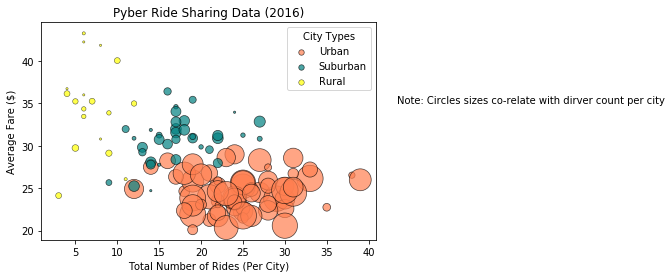

In [11]:
# Obtain the x and y coordinates for each of the three city types
urban_set = final_merge_for_plot.loc[final_merge_for_plot["type"] == "Urban"]
suburban_set = final_merge_for_plot.loc[final_merge_for_plot["type"] == "Suburban"]
rural_set = final_merge_for_plot.loc[final_merge_for_plot["type"] == "Rural"]
# Build the scatter plots for each city types
fig = plt.figure()
x = fig.add_subplot(1,1,1)
y = fig.add_subplot(1,1,1)
z = fig.add_subplot(1,1,1)

x.scatter(urban_set["Number of Riders"], urban_set['Average Fare($)'],(urban_set['driver_count']*10),facecolors='coral', edgecolors='black', alpha=0.7, label='Urban',linewidth=.7)
y.scatter(suburban_set['Number of Riders'], suburban_set['Average Fare($)'],(suburban_set['driver_count']*5),facecolors='teal', edgecolors='black', alpha=0.7, label='Suburban',linewidth=.7)
z.scatter(rural_set['Number of Riders'],rural_set['Average Fare($)'],(rural_set['driver_count']*5),facecolors='yellow', edgecolors='black', alpha=0.7, label='Rural',linewidth=.5)

# Incorporate the other graph properties

# Create a legend
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
# plt.text(.73,.60,"Note: Circles sizes co-relate with dirver count per city", transform=plt.gcf().transFigure)
plt.figtext(.95, .60, "Note: Circles sizes co-relate with dirver count per city")
lgnd = plt.legend(loc='best', title = 'City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
# Incorporate a text label regarding circle size
plt.savefig("BubblePlot.jpg")
# Save Figure
plt.show()


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

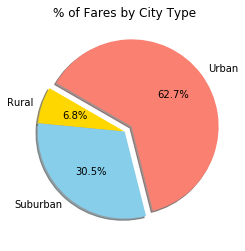

In [5]:
# Calculate Type Percents
city_rider_dataset
city_rider_dataset_by_type = city_rider_dataset.groupby("type")
total_fare = city_rider_dataset_by_type.sum().reset_index()
labels = total_fare["type"]
to_pie_total_fare = total_fare["fare"]
explode = (0,0,0.1)
colors = ['gold', 'skyblue', 'salmon']
# # Build Pie Chart
plt.pie(to_pie_total_fare, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Fares by City Type')

# # Save Figure
plt.savefig("PieChartFares.jpg")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

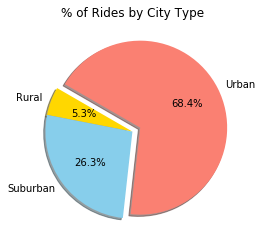

In [7]:
# Calculate Ride Percents
city_rider_dataset
total_rides = city_rider_dataset[["city","ride_id","type"]]
total_rides_by_type = total_rides.groupby("type")
total_rides_to_plot = total_rides_by_type.count().reset_index()
total_rides_to_plot = total_rides_to_plot["city"]
# Build Pie Chart
explode = (0,0,.1)
colors = ['gold', 'skyblue', 'salmon']
plt.pie(total_rides_to_plot, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Rides by City Type')



# Save Figure
plt.savefig("PieChartTotalRides.jpg")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

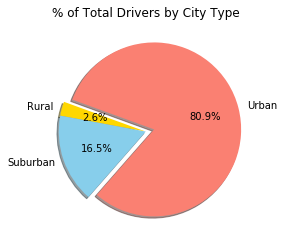

In [9]:
# Calculate Driver Percents
city_rider_dataset
driver_count = city_rider_dataset[["city","driver_count","type"]]
driver_count = driver_count.drop_duplicates()
driver_count_by_type = driver_count.groupby("type")
total_driver_count = driver_count_by_type.sum()
total_driver_count
# Build Pie Charts
explode = (0,0,.1)
colors = ['gold', 'skyblue', 'salmon']
plt.pie(total_driver_count, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Drivers by City Type')

# total_driver_count.dtypes
# Save Figure
plt.savefig("PieChartDriverPercent.jpg")

In [10]:
# Show Figure
plt.show()